<a href="https://colab.research.google.com/github/Akshay-Rajesh/DSA_Assignments_AkshaY/blob/main/Case_study_on_Unsupervised_Learning_Clustering%2CKmeans%2CPCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
the optimum number of clusters

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Wine.csv")

In [3]:
data.isna().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [5]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [8]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [9]:
from sklearn.preprocessing import StandardScaler
scaled_data = pd.DataFrame(StandardScaler().fit_transform(data) , columns=data.columns, index =data.index)

In [10]:
scaled_data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


# **K means Clustering**

In [7]:
from sklearn.cluster import KMeans

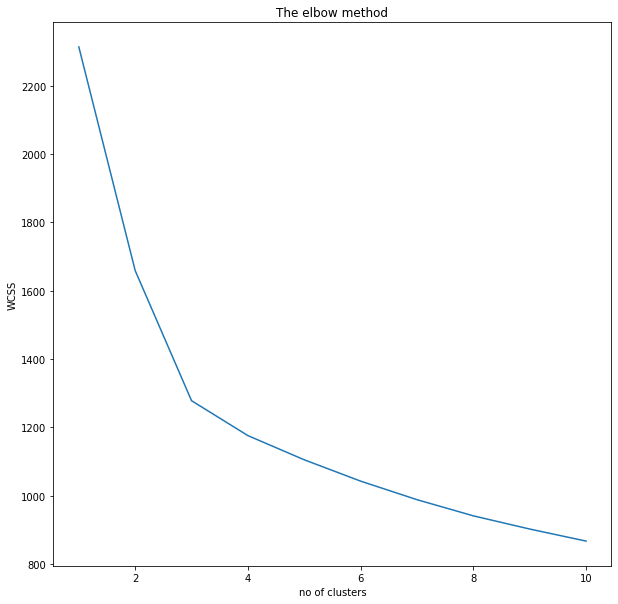

In [12]:
# Finding the optimun k value using wcss method , elbow graph

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i , init="k-means++", random_state=42)
  kmeans.fit(scaled_data)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

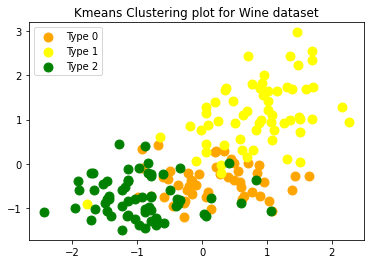

In [22]:
# from the above ELbow graph its clear that the no of clustres to use is 3.
kmeans = KMeans(n_clusters = 3 , init ="k-means++",max_iter = 1000 ,random_state=42)
kmeans.fit(scaled_data)
kmean_clusters = kmeans.labels_
plt.scatter(scaled_data.iloc[kmean_clusters == 0, 0], scaled_data.iloc[kmean_clusters == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(scaled_data.iloc[kmean_clusters == 1, 0], scaled_data.iloc[kmean_clusters == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(scaled_data.iloc[kmean_clusters == 2, 0], scaled_data.iloc[kmean_clusters == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

# **HC , dendrogram**



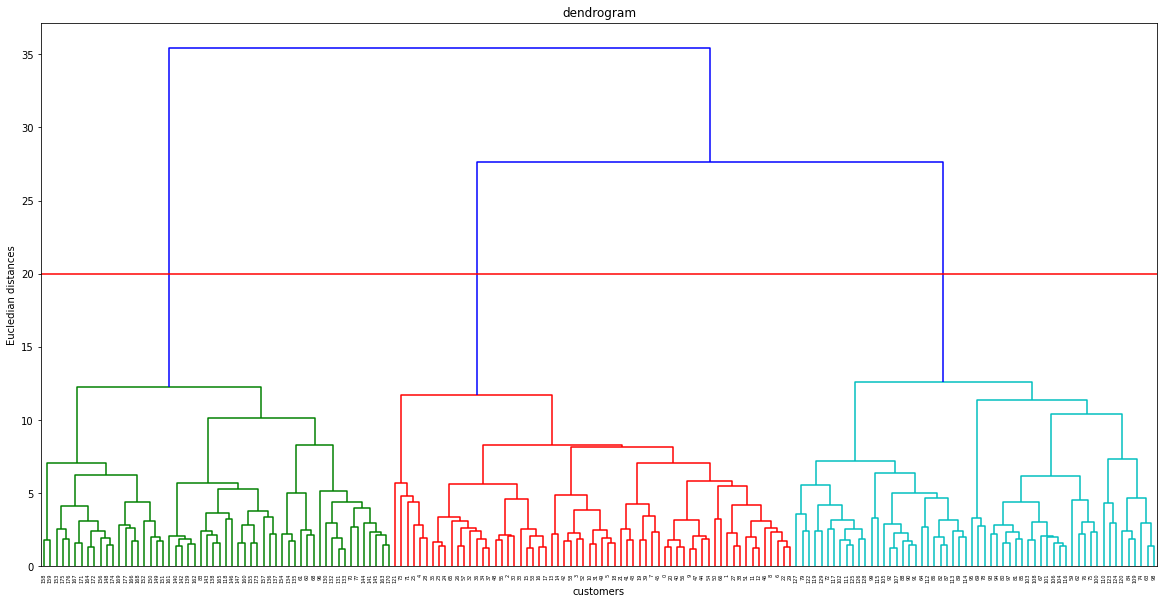

In [25]:
#Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = "ward"))
plt.hlines(20,0,6000,colors="red" , linestyles="solid") # for thehorizontal cut line 
plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Eucledian distances")
plt.show()

In [29]:
# from the above dendrogram its clear we have 3 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
model_hc = hc.fit(scaled_data)
HC_clusters = model_hc.labels_

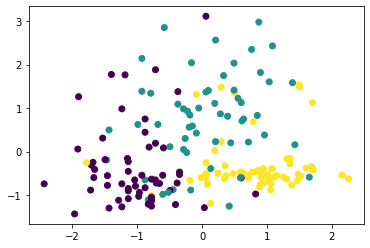

In [30]:
plt.scatter(scaled_data.iloc[:,0],scaled_data.iloc[:,1],c=HC_clusters)

# **PCA**

In [38]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(scaled_data)
pca.transform(scaled_data)
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

We use scree plot to determine how much of our variance is explaied by our PCA components .

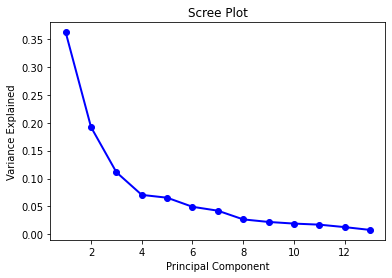

In [39]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

The x-axis displays the principal component and the y-axis displays the percentage of total variance explained by each individual principal component.

We can also use the following code to display the exact percentage of total variance explained by each principal component:

In [40]:
print(pca.explained_variance_ratio_)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


In [41]:
# we can see almost 90% of the variance is explained by the 8 components so we need only 8 components .'

pca = PCA(n_components=8)
pca.fit(scaled_data)
pca_data = pca.transform(scaled_data)

# **Kmeans using PCA**

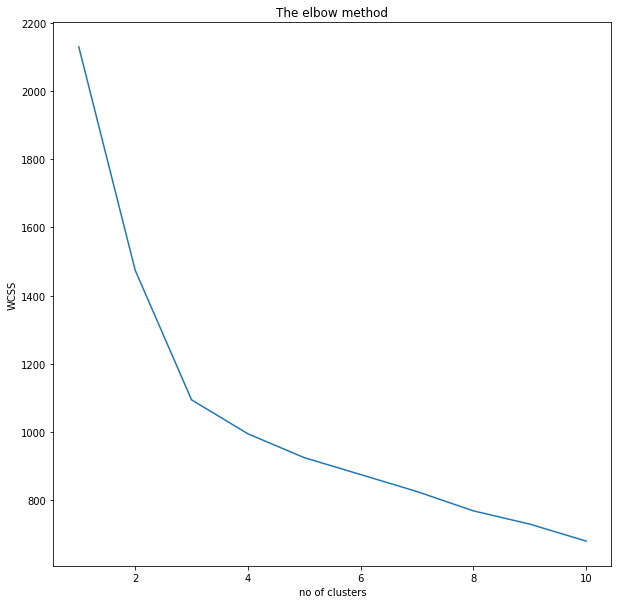

In [42]:
# Finding the optimun k value using wcss method , elbow graph

wcss =[]
for i in range (1,11):
  kmeans = KMeans(n_clusters=i , init="k-means++", random_state=42)
  kmeans.fit(pca_data)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.title("The elbow method")
plt.xlabel("no of clusters")
plt.ylabel("WCSS")
plt.show()

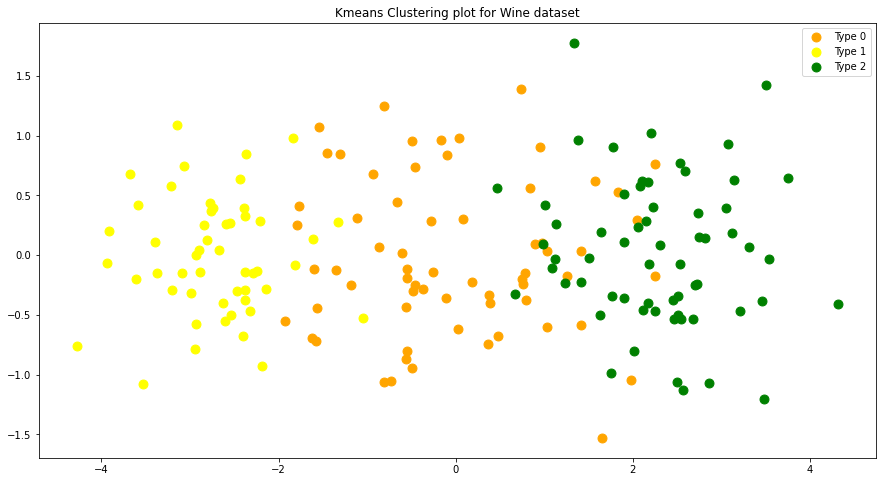

In [50]:
# from the above ELbow graph its clear that the no of clustres to use is 3.

kmeans = KMeans(n_clusters = 3 , init ="k-means++",max_iter = 1000 ,random_state=42)
kmeans.fit(pca_data)
kmean_clusters = kmeans.labels_
plt.figure(figsize=(15,8))
plt.scatter(pca_data[kmean_clusters == 0, 0], pca_data[kmean_clusters == 0, 7], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(pca_data[kmean_clusters == 1, 0], pca_data[kmean_clusters == 1, 7], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(pca_data[kmean_clusters == 2, 0], pca_data[kmean_clusters == 2, 7], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

# **HC using PCA**

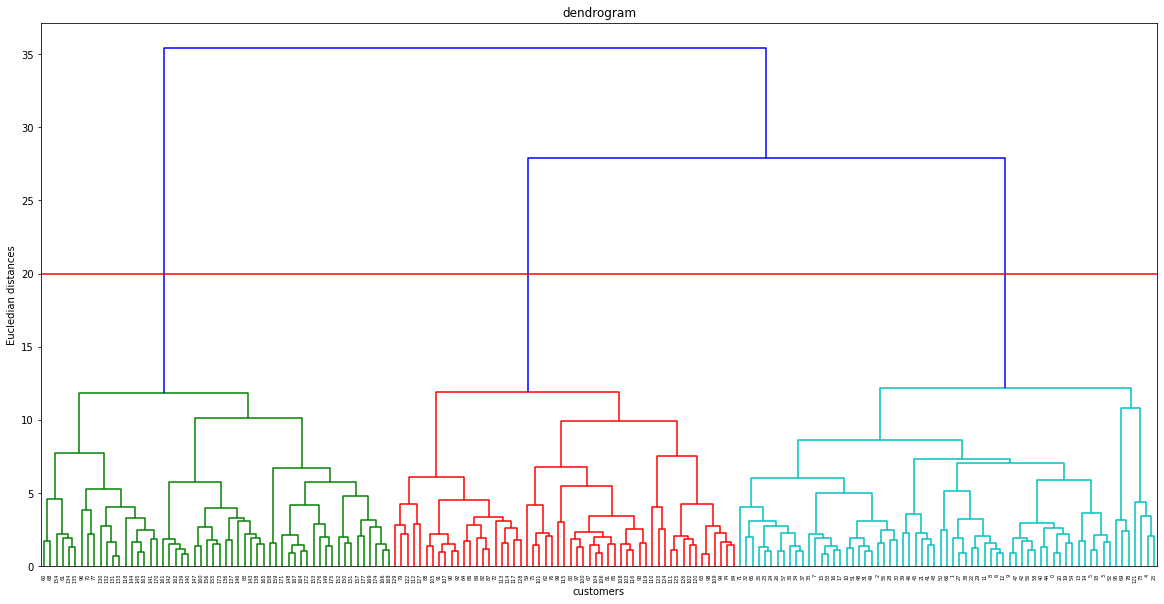

In [51]:
#Using the dendrogram to find the optimal number of clusters

import scipy.cluster.hierarchy as sch
plt.subplots(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(pca_data, method = "ward"))
plt.hlines(20,0,6000,colors="red" , linestyles="solid") # for thehorizontal cut line 
plt.title("dendrogram")
plt.xlabel("customers")
plt.ylabel("Eucledian distances")
plt.show()

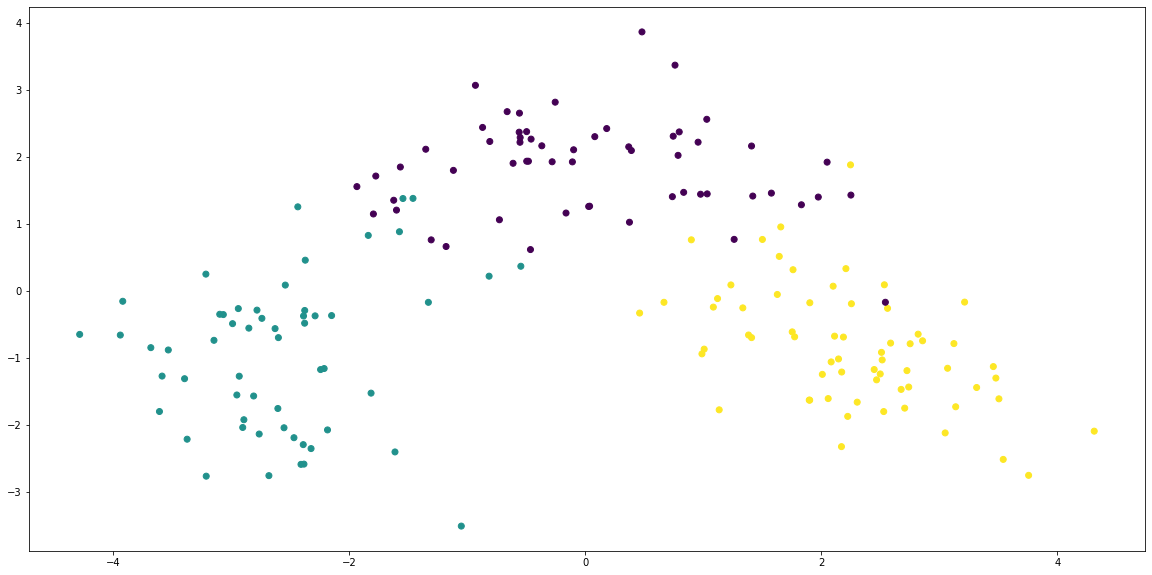

In [54]:
# from the above dendrogram its clear we have 3 clusters
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3 , affinity = "euclidean" , linkage = "ward")
model_hc = hc.fit(scaled_data)
HC_clusters = model_hc.labels_
plt.subplots(figsize=(20,10))
plt.scatter(pca_data[:,0],pca_data[:,1],c=HC_clusters)